In [5]:
import pandas as pd

data = pd.read_csv(sensor_data.csv)

avg_temp = data("Temperature").mean

print(avg_temp)

NameError: name 'sensor_data' is not defined

In [6]:
import pandas as pd

# Create a small dataset
data = pd.DataFrame({
    "Temperature": [40, 42, 39, 41, 43],
    "Pressure": [101.2, 100.8, 101.5, 101.0, 100.9],
    "Strain": [0.12, 0.15, 0.11, 0.13, 0.14]
})

# View the first few rows
print(data.head())

   Temperature  Pressure  Strain
0           40     101.2    0.12
1           42     100.8    0.15
2           39     101.5    0.11
3           41     101.0    0.13
4           43     100.9    0.14


In [7]:
data.info()       # shows column names, data types, and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  5 non-null      int64  
 1   Pressure     5 non-null      float64
 2   Strain       5 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 252.0 bytes


In [8]:
#data.info()       # shows column names, data types, and missing values
data.describe()   # gives statistics like mean, std, min, max
#data.shape        # shows number of rows and columns

,Temperature,Pressure,Strain
count,5.000000,5.000000,5.000000
mean,41.000000,101.080000,0.130000
std,1.581139,0.277489,0.015811
min,39.000000,100.800000,0.110000
25%,40.000000,100.900000,0.120000
50%,41.000000,101.000000,0.130000
75%,42.000000,101.200000,0.140000
max,43.000000,101.500000,0.150000


In [9]:
#data.info()       # shows column names, data types, and missing values
#data.describe()   # gives statistics like mean, std, min, max
data.shape        # shows number of rows and columns

(5, 3)

Missing values

Wrong column names

Outliers

Duplicate rows

Yes, data.isnull().sum() gives the count of missing (null) values per column.

In [37]:
import pandas as pd

data = pd.DataFrame({
    "Temperature": [40, None, 39, 41, 43],
    "Pressure": [101.2, 100.8, None, 101.0, 100.9],
    "Strain": [0.12, 0.15, 0.11, None, 0.14]
})

print(data.isnull())
print(data.isnull().sum())


   Temperature  Pressure  Strain
0        False     False   False
1         True     False   False
2        False      True   False
3        False     False    True
4        False     False   False
Temperature    1
Pressure       1
Strain         1
dtype: int64


If less than 1% values are missing, then use the drop method; otherwise, use the fill method.

In [11]:
# Drop rows with missing values
data_cleaned = data.dropna()

# Fill missing values with mean
data_filled = data.fillna(data.mean())


In [12]:
print(data_cleaned.isnull())
print(data_cleaned.isnull().sum())
print(data_filled.isnull())
print(data_filled.isnull().sum())

   Temperature  Pressure  Strain
0        False     False   False
4        False     False   False
Temperature    0
Pressure       0
Strain         0
dtype: int64
   Temperature  Pressure  Strain
0        False     False   False
1        False     False   False
2        False     False   False
3        False     False   False
4        False     False   False
Temperature    0
Pressure       0
Strain         0
dtype: int64


In [13]:
data

#data_cleaned

#data_filled

,Temperature,Pressure,Strain
0,40.0,101.2,0.12
1,NaN,100.8,0.15
2,39.0,NaN,0.11
3,41.0,101.0,NaN
4,43.0,100.9,0.14


In [17]:
# Select rows where Temperature is above 40
hot_data = data[data["Temperature"] > 40]

# Or multiple conditions (Temperature > 40 AND Strain > 0.13)
filtered = data[(data["Temperature"] > 40) & (data["Strain"] > 0.13)]

hot_data
#
#filtered



,Temperature,Pressure,Strain
3,41.0,101.0,NaN
4,43.0,100.9,0.14


In [20]:
pressure_data = data[data["Pressure"] < 101.0]
pressure_data

,Temperature,Pressure,Strain
1,NaN,100.8,0.15
4,43.0,100.9,0.14


In [23]:
Combine_condition = data[(data["Temperature"] > 40) & (data["Pressure"] < 101)]
Combine_condition

,Temperature,Pressure,Strain
4,43.0,100.9,0.14


Let’s dive into Step 8 — Sorting and Summarizing Data — this is where Pandas starts to feel powerful.

In [33]:
# Sort by Temperature (ascending)
data_filled.sort_values("Temperature")
print(data_filled)
# Sort by Pressure (descending)
data_filled.sort_values("Pressure", ascending=False)
print(data_filled)
# Sort by multiple columns
data_filled.sort_values(["Pressure", "Temperature"], ascending=[False, True])
print(data_filled)

#find max, min, or average?
max_t = data_filled["Temperature"].max()
min_P = data_filled["Pressure"].min()
mean_Strain = data_filled["Strain"].mean()
print(max_t)
print(min_P)
print(mean_Strain)
data_filled.describe()

   Temperature  Pressure  Strain
0        40.00   101.200    0.12
1        40.75   100.800    0.15
2        39.00   100.975    0.11
3        41.00   101.000    0.13
4        43.00   100.900    0.14
   Temperature  Pressure  Strain
0        40.00   101.200    0.12
1        40.75   100.800    0.15
2        39.00   100.975    0.11
3        41.00   101.000    0.13
4        43.00   100.900    0.14
   Temperature  Pressure  Strain
0        40.00   101.200    0.12
1        40.75   100.800    0.15
2        39.00   100.975    0.11
3        41.00   101.000    0.13
4        43.00   100.900    0.14
43.0
100.8
0.13


,Temperature,Pressure,Strain
count,5.00000,5.000000,5.000000
mean,40.75000,100.975000,0.130000
std,1.47902,0.147902,0.015811
min,39.00000,100.800000,0.110000
25%,40.00000,100.900000,0.120000
50%,40.75000,100.975000,0.130000
75%,41.00000,101.000000,0.140000
max,43.00000,101.200000,0.150000


In [34]:
# Example dataset
df = pd.DataFrame({
    "Machine": ["A", "A", "B", "B", "B"],
    "Temperature": [40, 42, 39, 41, 43]
})

# Average temperature by machine
df.groupby("Machine")["Temperature"].mean()


Machine
A    41.0
B    41.0
Name: Temperature, dtype: float64

You now know how to load, inspect, clean, filter, sort, and summarize data — that’s nearly everything for Python + Pandas basics!

| Step | Skill                     | Key Commands                                  | Core Idea                       |
| ---- | ------------------------- | --------------------------------------------- | ------------------------------- |
| 1️⃣  | **Load Data**             | `pd.read_csv("file.csv")`                     | Read CSV into a DataFrame       |
| 2️⃣  | **View Data**             | `data.head()`, `data.shape`, `data.info()`    | Inspect first rows, size, types |
| 3️⃣  | **Summary Stats**         | `data.describe()`                             | Mean, std, min, max per column  |
| 4️⃣  | **Handle Missing Values** | `data.isnull().sum()`, `dropna()`, `fillna()` | Detect and fix missing data     |
| 5️⃣  | **Select Columns/Rows**   | `data["col"]`, `data[data["col"] > value]`    | Extract specific data           |
| 6️⃣  | **Sort Data**             | `sort_values("col", ascending=False)`         | Order rows by value             |
| 7️⃣  | **Group & Aggregate**     | `groupby("col").mean()`                       | Compute averages by category    |


Next module → 📊 Data Visualization with Matplotlib & Seaborn

We’ll cover:

Creating line, bar, and scatter plots

Adding titles, labels, and legends

Styling charts for clarity

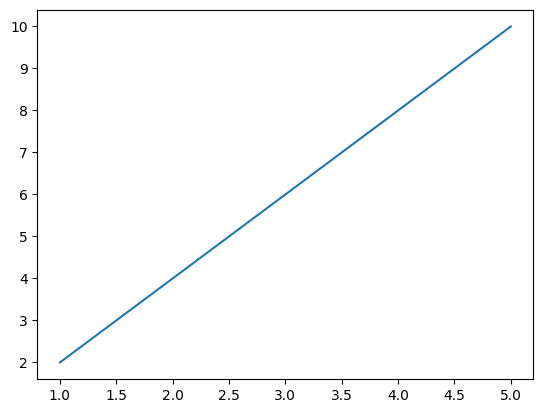

In [38]:
import matplotlib.pyplot as plt

#Data
x = [1,2,3,4,5]
y = [2,4,6,8,10]

#Create a line plot
plt.plot(x, y)
plt.show()

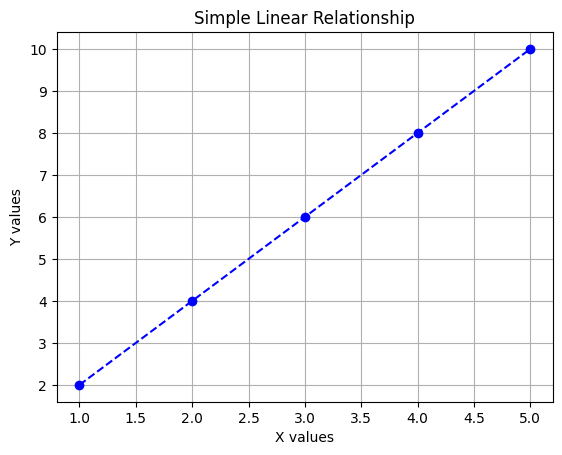

In [39]:
plt.plot(x, y, color='blue', marker='o', linestyle='--')
plt.title("Simple Linear Relationship")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.grid(True)
plt.show()


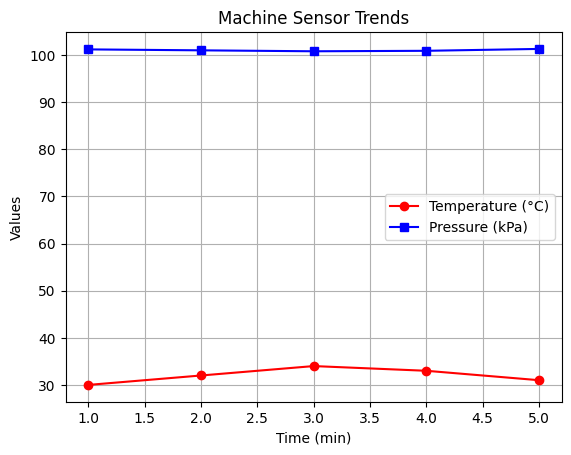

In [40]:
x = [1, 2, 3, 4, 5]
temp = [30, 32, 34, 33, 31]
pressure = [101.2, 101.0, 100.8, 100.9, 101.3]

plt.plot(x, temp, label="Temperature (°C)", color='red', marker='o')
plt.plot(x, pressure, label="Pressure (kPa)", color='blue', marker='s')
plt.title("Machine Sensor Trends")
plt.xlabel("Time (min)")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()


| Command                                       | Purpose                       |
| --------------------------------------------- | ----------------------------- |
| `plt.plot(x, y)`                              | Create a line plot            |
| `color`, `marker`, `linestyle`                | Customize style               |
| `plt.title()`, `plt.xlabel()`, `plt.ylabel()` | Add chart labels              |
| `plt.legend()`                                | Add legend for multiple lines |
| `plt.grid(True)`                              | Show grid lines for clarity   |


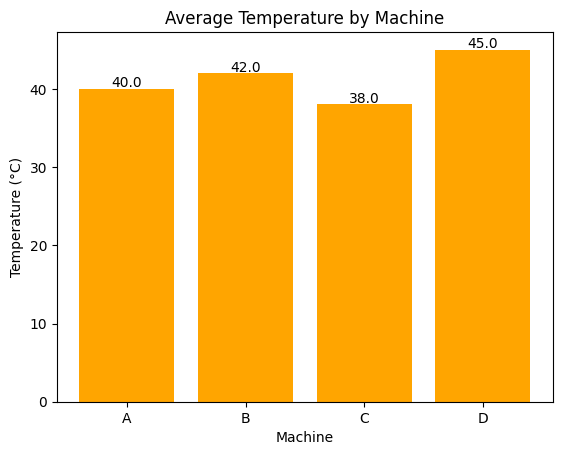

In [44]:
import matplotlib.pyplot as plt

machines = ["A", "B", "C", "D"]
temperature = [40, 42, 38, 45]

bars = plt.bar(machines, temperature, color="orange")
plt.title("Average Temperature by Machine")
plt.xlabel("Machine")
plt.ylabel("Temperature (°C)")

# Add values above each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
             f"{bar.get_height():.1f}", ha='center')

plt.show()


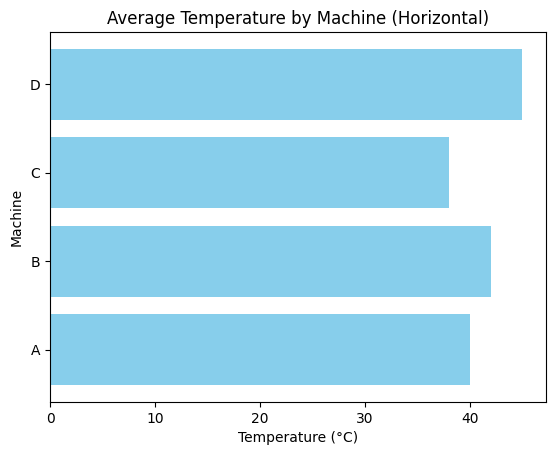

In [42]:
plt.barh(machines, temperature, color="skyblue")
plt.title("Average Temperature by Machine (Horizontal)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Machine")
plt.show()


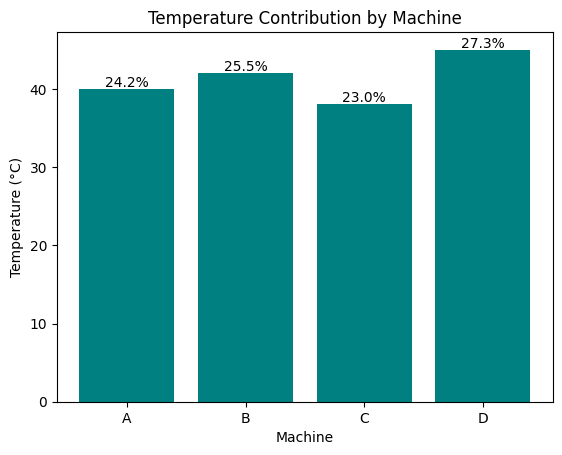

In [ ]:
import matplotlib.pyplot as plt

machines = ["A", "B", "C", "D"]
temperature = [40, 42, 38, 45]

total = sum(temperature)
percentages = [value / total * 100 for value in temperature]

bars = plt.bar(machines, temperature, color="teal")
plt.title("Temperature Contribution by Machine")
plt.xlabel("Machine")
plt.ylabel("Temperature (°C)")

# Add percentage labels above each bar
for bar, pct in zip(bars, percentages):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.3,
        f"{pct:.1f}%",
        ha='center'
    )

plt.show()

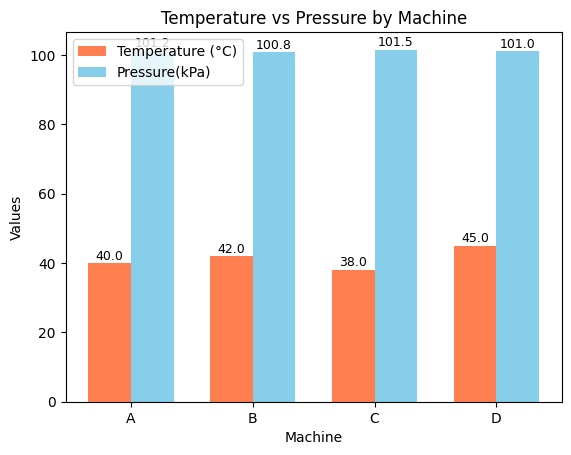

In [12]:
import matplotlib.pyplot as plt
import numpy as np

machines = ["A", "B", "C", "D"]
temperature = [40, 42, 38, 45]
pressure = [101.2, 100.8, 101.5, 101.0]

x = np.arange(len(machines))
width = 0.35
x

bars1 = plt.bar(x-width/2, temperature, width, label="Temperature (°C)", color="coral")
bars2 = plt.bar(x+width/2, pressure, width, label="Pressure(kPa)", color="skyblue")

plt.xlabel("Machine")
plt.ylabel("Values")
plt.title("Temperature vs Pressure by Machine")
plt.xticks(x, machines)
plt.legend() #Legend shows which color belongs to which machine

# Add values above each bar
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
             f"{bar.get_height():.1f}", ha='center', va='bottom', fontsize=9)
    
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
             f"{bar.get_height():.1f}", ha='center', va='bottom', fontsize=9)

plt.show()


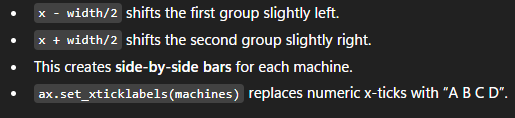

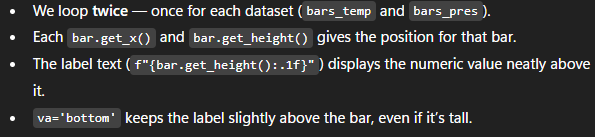

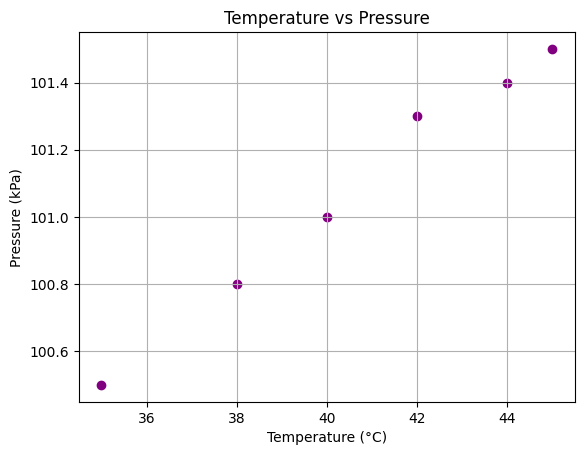

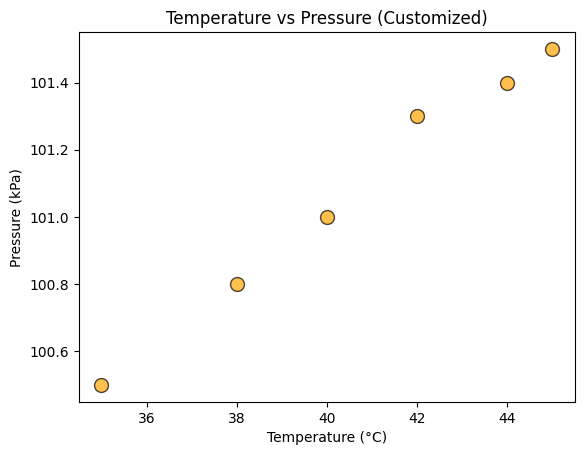

In [14]:
import matplotlib.pyplot as plt

temperature = [35, 40, 42, 38, 45, 44]
pressure = [100.5, 101.0, 101.3, 100.8, 101.5, 101.4]

plt.scatter(temperature, pressure, color='purple', marker='o')
plt.title("Temperature vs Pressure")
plt.xlabel("Temperature (°C)")
plt.ylabel("Pressure (kPa)")
plt.grid(True)
plt.show()

plt.scatter(temperature, pressure, 
            color='orange', 
            s=100,         # size of each point
            edgecolor='black',
            alpha=0.7)     # transparency

plt.title("Temperature vs Pressure (Customized)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Pressure (kPa)")
plt.show()


Seaborn is built on top of Matplotlib, but it automatically adds cleaner designs, colors, and built-in statistical features — perfect for Data Science work.

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


<function matplotlib.pyplot.show(close=None, block=None)>

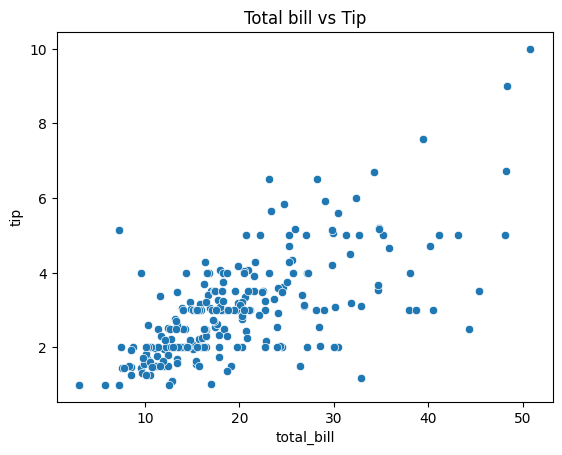

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

tips_data = sns.load_dataset("tips")
print(data.head())

sns.scatterplot(x="total_bill", y="tip", data=tips_data)
plt.title("Total bill vs Tip")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

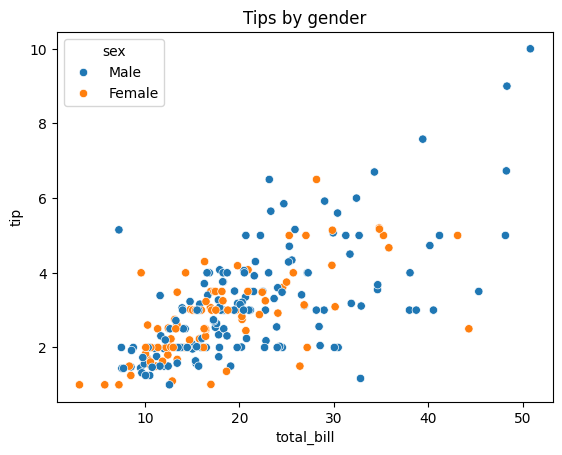

In [29]:
sns.scatterplot(x="total_bill", y="tip", hue="sex", data=tips_data)
plt.title("Tips by gender")
plt.show



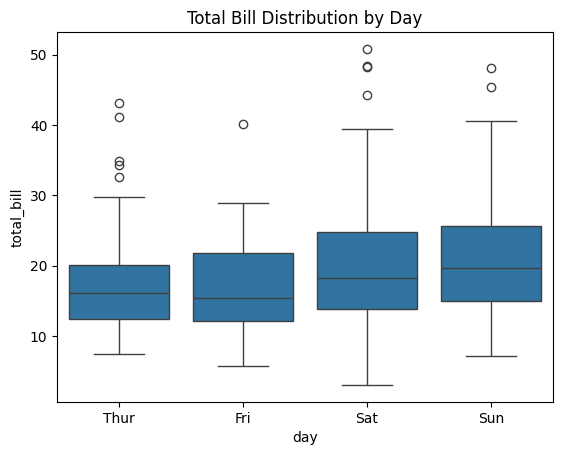

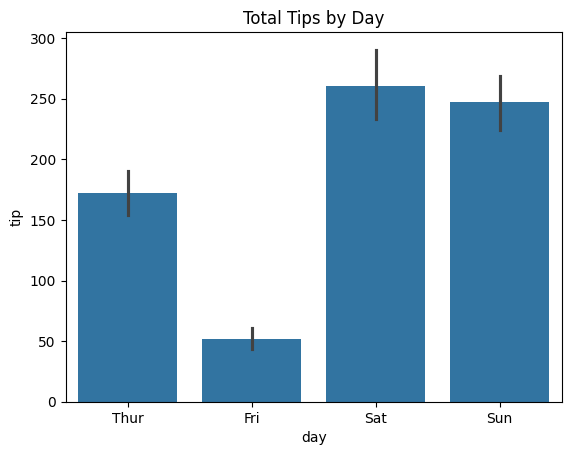

In [ ]:
sns.boxplot(x="day", y="total_bill", data=tips_data)
plt.title("Total Bill Distribution by Day")
plt.show()

sns.barplot(x="day", y="tip", data=tips_data, estimator=sum)
plt.title("Total Tips by Day")
plt.show()

#Boxplot → shows distribution, median, and outliers
#Barplot → shows averages (or sums if you set estimator=sum)

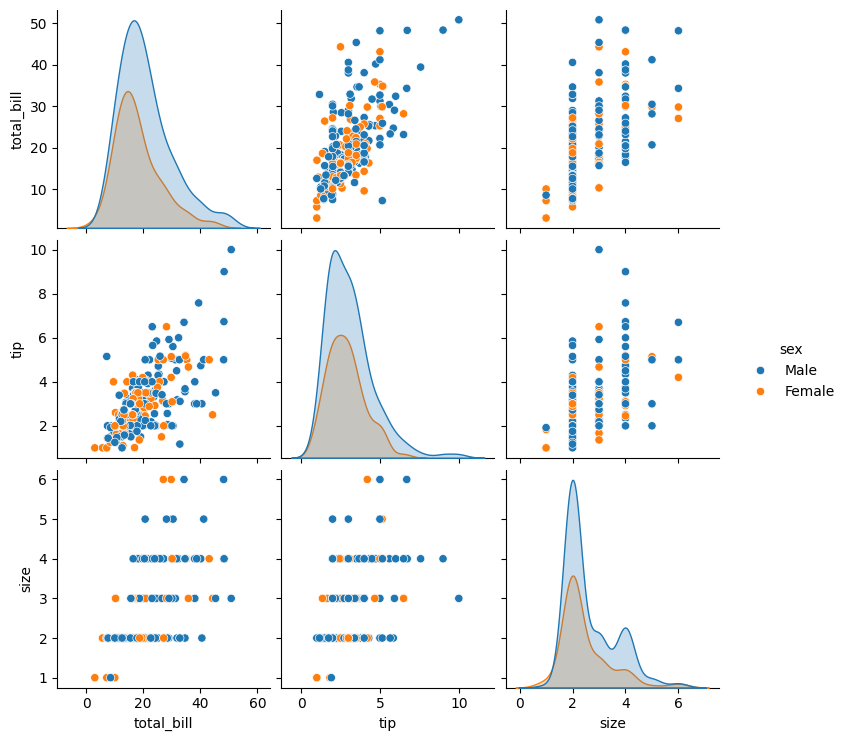

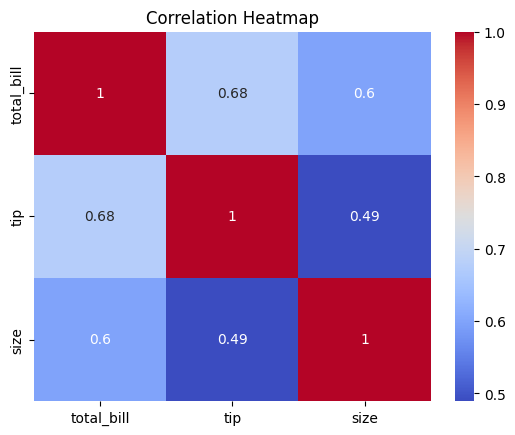

In [31]:
sns.pairplot(tips_data, vars=["total_bill", "tip", "size"], hue="sex")
plt.show()

sns.heatmap(tips_data[["total_bill", "tip", "size"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


scatterplot (relationships)

barplot and boxplot (comparisons and distributions)

pairplot and heatmap (multi-variable insights)

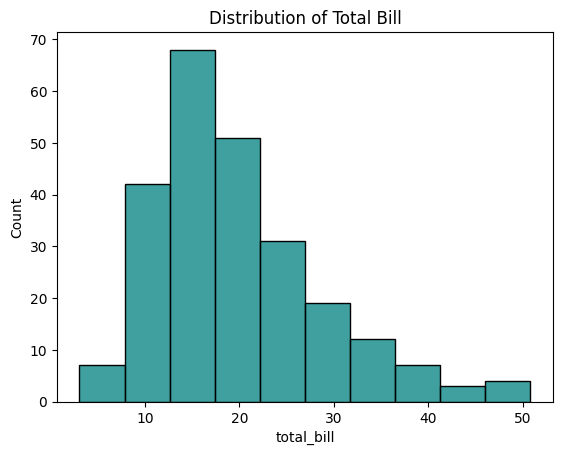

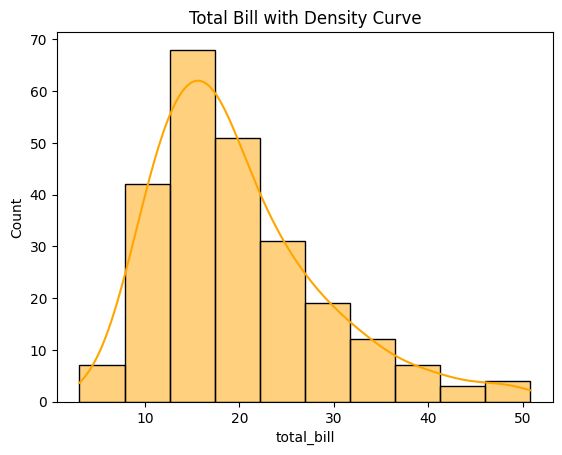

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset("tips")

#Shows how a numeric variable is distributed — e.g., most bills are between $10–$30.
# Histogram
sns.histplot(data["total_bill"], bins=10, kde=False, color="teal")
plt.title("Distribution of Total Bill")
plt.show()

# Add KDE (smooth curve)
sns.histplot(data["total_bill"], bins=10, kde=True, color="orange")
plt.title("Total Bill with Density Curve")
plt.show()

/tmp/ipykernel_92192/4284886943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="day", data=data, palette="Set2")


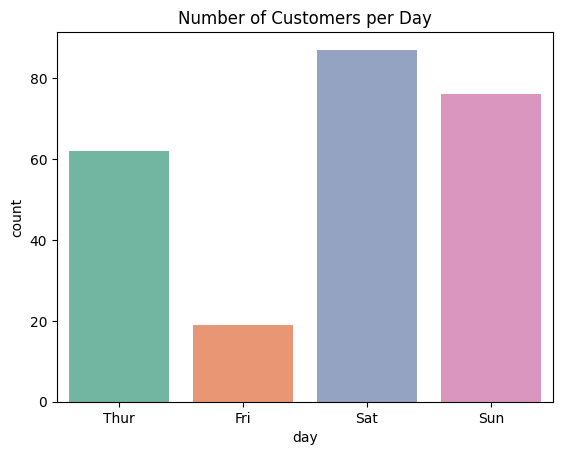

In [36]:
#Count Plot (for Categorical Data)
sns.countplot(x="day", data=data, palette="Set2")
plt.title("Number of Customers per Day")
plt.show()

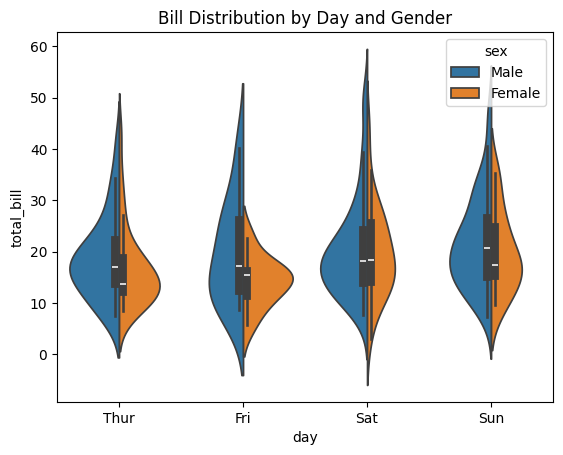

In [ ]:
# Violin Plot (Distribution + Median)
# Combines boxplot + KDE → shows distribution shape and median per category.
sns.violinplot(x="day", y="total_bill", hue="sex", data=data, split=True)
plt.title("Bill Distribution by Day and Gender")
plt.show()

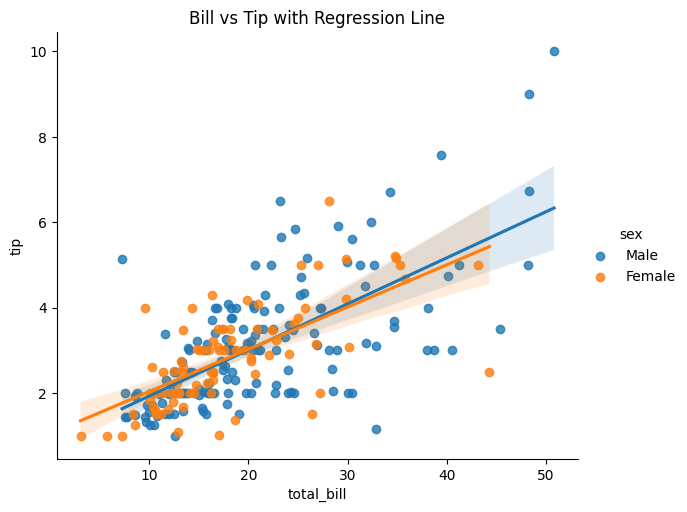

In [ ]:
# Regression Plot (Trend Line)
# Shows relationships and regression fit — perfect for ML intuition 
# (linear trends, correlations).
sns.lmplot(x="total_bill", y="tip", data=data, hue="sex", height=5, aspect=1.2)
plt.title("Bill vs Tip with Regression Line")
plt.show()